
---

## Machine Learning with Scikit-learn

Building your first Linear Regression model using scikit-learn.

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import random as nr

from matplotlib import pyplot as plt
import seaborn as sns

In [86]:
file = 'automobile.csv'
auto_prices = pd.read_csv(file)

In [87]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Notice there are both numeric and categorical features.

Execute the code in the cell below to display the data types of each column

In [88]:
(auto_prices.astype(np.object) == '?').any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [89]:
auto_prices.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Compare the columns with missing values to their data types. In all cases, the columns with missing values have an `object` (character) type as a result of using the '?' code. As a result, some columns that should be numeric (bore, stroke, horsepower, peak_rpm, and price) are coded as `object`.  
  
The next question is how many missing values are in each of these `object` type columns?  
Execute the code in the cell below to display the counts of missing values.

In [90]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x == '?']
        print(col + ' ' + str(sum(count)))

normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
engine-type 0
num-of-cylinders 0
fuel-system 0
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


The `normalize_losses` column has a significatn number of missing values and will be removed. Columns that should be numeric, but contain missing value, are processed in the following manner:
1. The '?' values are computed to Pandas Numpy using values `nan`.
2. Rows containing `nan` values are removed.
  
Execute the code, noticing the resulting shape of the data frame.

In [91]:
## Drop column with too many missing values
auto_prices.drop('normalized-losses', axis = 1, inplace = True)

## Remove rows with missing values, accounting for missing values coded as '?'
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for column in cols:
    auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)
auto_prices.shape

(195, 25)

The data set now contains 195 cases and 25 rows. 10 rows have been dropped by removing missing values.


#### Aggregating categorical variables

When a dataset contains categorical variables these need to be investigated to ensure that each category has sufficient samples. It is commonly the case that some categories may have few samples, or have so many similar categories as to be meaningless.  
  
As a specific case, you will examine the number of cylinders in the cars. Execute the code in the cell below to point a frequency table for this variables and examine the result.

In [92]:
auto_prices['num-of-cylinders'].value_counts()

four      155
six        24
five       10
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

Notice that there is only one car with three and twelve cylinders. There are four cars with eight cylinders, and 10 cars with five cylinders. It is likely that all of these categories will not have statistically significant difference in predicting auto price. It is clear that these categories need to be aggregated.  
  
The code in the cell below uses a Python dictionary to recode the number of cylinder categories into a smaller number categories. Execute this code and examine the resultsing frequency table.

In [93]:
cylinder_categories = {'three':'three_four', 'four':'three_four', 'five':'five_six', 'six':'five_six', 'eight':'eight_twelve','twelve':'eight_twelve'}
auto_prices['num-of-cylinders'] = [cylinder_categories[x] for x in auto_prices['num-of-cylinders']]

In [94]:
auto_prices['num-of-cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num-of-cylinders, dtype: int64

There are now three categories. One of these categories only has five members. However, it is likely that these autos will have different pricing from others.  
  
Next, execute the code in the cell below to make the box plots of the new cylinder categories.

In [78]:
# def plot_box(auto_prices, col, col_y = 'price'):
#     sns.set_style("whitegrid")
#     sns.boxplot(col, col_y, data=auto_prices)
#     plt.xlabel(col) # set text for the x axis
#     plt.ylabel(col_y) # set text for the y axis
#     plt.show()
    
# plot_box(auto_prices, 'num-of-cylinders')

Indeed, the price range of these categories is distinctive. It is likely that these new categories will be useful in predicting the price of autos.  
  
Now, execute the code in the cell below and examine the frequency table for the `body_style` feature.

In [95]:
auto_prices['body-style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

Two of these categories have a limited number of cases. These categories can be aggregated to increase the number of cases using a similar approach as used for the number of cylinders. Execute the code in the cell below to aggregate these categories.

In [96]:
body_cats = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon',
            'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
auto_prices['body-style'] = [body_cats[x] for x in auto_prices['body-style']]

In [97]:
auto_prices['body-style'].value_counts()

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body-style, dtype: int64


---

#### Transforming numeric variables

To improve performance of machine learning models transformation of the values are often applied.  
Typically, transformation are used to make the relationships between variables mroe linear. In other cases, transformation are performed to make distribution closer to Normal, or at least more symmetric. Theses treansformation can include taking logarithms, exponential transformations and power transformations.
  
In this case, you will transform the label, the price of the car. Execute the code in the cell below to display and examine a histogram of the label.

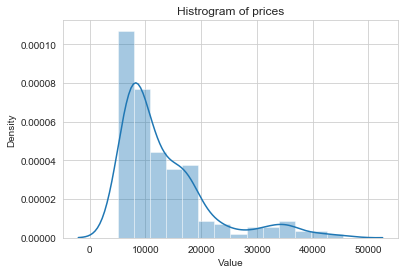

In [98]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histrogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(auto_prices['price'], 'prices')

The distribution of auto price is both quite skewed to the left and multimodal. Given the skew and the fast that there are no values less than or equal to zero, a log transformation might be appropriate.  
  
The code in the cell below displays a histogram of the logarithm of prices. Execute this code and examine the result.

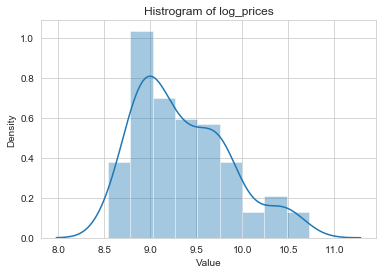

In [107]:
auto_prices['log_price'] = np.log(auto_prices['price'].astype(int))
hist_plot(auto_prices['log_price'], 'log_prices')

The distribution of the logarithm of price is more symmetric, but still shows some multimodal tendency and skew. Nonetheless, this is an improcement so we will use these values as out label.  



---

### Split the dataset

With the model matrix constructed, you must now create randomly sampled training and test data sets.  
The code in the cell below uses the `train_test_split` function from the `sklean.model_selection module` to Bernoulli sample the cases in the original dataset into the two subsets. Since this data set is small only 40 cases will be included in the test dataset. Execute this code.

In [117]:
# ## Randomly sample cases to create independent training and test data
# nr.seed(9988)
# labels = np.array(auto_prices['log_price'])
# indx = range(Features.shape[0])
# indx = ms.train_test_split(indx, test_size = 40)

# x_train = Features[indx[0],:]
# y_train = np.ravel(labels[indx[0]])
# x_test = Features[indx[1],:]
# y_test = no.ravel(labels[index[1]])

#### Rescale numeric features

Numeric features must be rescaled so they have a similar range of values. Rescaling present features from having an undue influence on model training simply because they have a large range of numeric variables.  
  
The code in the cell below uses the `StandardScaler` function from the `sklearn PROCESSING` package to Zscore scale the numeric features. Notice that the scaler is fit only on the training data. The training scaler is these applied to the test data. Test data should always be scaled using the parameters from the training data.  
  
Execute this code.

In [118]:
# scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
# x_train[:,14:] = scaler.transform(x_train[:,14:])
# x_test[:,14:] = scaler.transform(x_test[:,14:])
# x_train[:5,14:]

You can see that the numeric features have been rescaled are required.

In [129]:
X = auto_prices[['bore', 'stroke', 'compression-ratio' , 'horsepower']]
y = auto_prices['log_price']


x_train, x_test, y_train, y_test = train_test_split(X, y)


---

## Construct the linear regression model

With data prepared and split into training and test subsets, you will now compute the linear regression model. There are 28 features, so the model will require at least 28 coefficients.  
The equation for such a **multiple regression** problem can be written as:

$y=f(x)$
  
where:  
Y are the predicted values or scores.  
X is the vector of feature values with components {...  
B is vector of model coefficients with components {...  
b is the intercept term, if there is one.  
  
You can think of the linear regression function *F(X)* as the dor product between the beta vector B and the feature vector X, plus the intercept term B.  
  
The code in the cell below uses the `sklearn import linear_model` to compute a least squares linear model as follow:  
  
1. A linear regression model object is created with the `LinearRegression` method. Notice, that in this case, no intercept will be fit. The intercept value or **blas** will be accommodated in the coefficients of the dummy variables for the vategorical features.
2. The model is fir using the `fit` method with the numpy array of features and the label.  
  
Execute this code.

In [130]:
from sklearn.linear_model import LinearRegression

## define and fir the linera regression model
lin_mod = LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

The model has been fit to the training data. Execute the code in the cell below to examine the value of the intercept term and coefficient.

In [132]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[1.66371185 0.89987099 0.02607782 0.00563248]


As expected, the intercept term is `0.0`. Roughly speaking, you can interpret the coefficients of the model as follow:  
1. The price of autos increases with weight (first coefficient), horsepower (second coefficient) and weakly decrease with fuel efficiency (third coefficient).
2. The coefficients for the dummy variables are in a similar range, indicating the bias or intercept has been incorporated in these.